In [192]:
import re
import numpy as np
import scipy.spatial.distance

In [417]:
class aproxi:
    def __init__(self, name_file):
        self.list_rows = self.getrows(name_file)
        self.len_list_rows = len(self.list_rows)
        self.dict_words = self.getset()
        self.len_dict_words = len(self.dict_words)
        self.matrix = self.getmatrix()
        self.dists = [scipy.spatial.distance.cosine(self.matrix[0,:], row) for row in self.matrix]

         
    def getrows(self, name_file):
        with open(name_file, 'r') as file:
            row_list = []
            for line in file.readlines():
                row_list.append(self.filter_row(re.split('[^a-z]', line.lower())))
                
        return row_list
        
    def filter_row(self, row):
        return [word for word in row if word != '']
    
    def getset(self):
        return list(set([el[i] for el in self.list_rows for i in range(len(el))]))
    
    def getmatrix(self):
        return np.matrix(
            [[self.list_rows[row].count(self.dict_words[col]) for col in range(self.len_dict_words)]
                                                                         for row in range(self.len_list_rows)]
        )
    
    def getaproxi(self, n):
        sort_dists = sorted(self.dists)
        return [sort_dists[i] for i in range(1, n+1)]
    
    
    def createfile(self):
        text = self.getaproxi(2)
        with open('solution_1.txt', 'w') as file:
            file.write(str(text[0])+' '+ str(text[1]))
    

file = aproxi('sentences.txt')    
print(file.getaproxi(2))
file.createfile()

[0.7327387580875756, 0.7770887149698589]


In [236]:
import math
import matplotlib.pyplot as plt
import scipy.spatial.distance

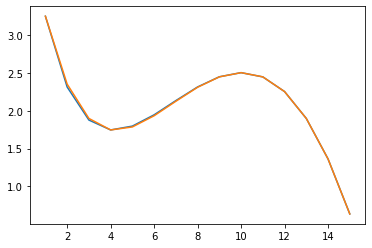

In [414]:
class Aproxifunc:
    
    def __init__(self, func, points):
        self.func = func
        self.points = points
        self.weights = self.getweights()
        self.grafic = self.show()
   
    def getweights(self):
        return scipy.linalg.solve([[i**k for k in range(len(self.points))] for i in self.points],
                                  [self.func(el) for el in self.points])
    
    def show(self, start = 1, end = 16):
        return plt.plot([i for i in range(start, end)],
                        [self.func(i) for i in range(start, end)],
                        [i for i in range(start, end)],
                        self.getaproxifunc(start, end )
                       )
    
    def getaproxifunc(self, start, end):
        return [sum([self.weights[k]*el**[i for i in range(len(self.weights))][k]
                     for k in range(len(self.weights))])
                for el in range(start, end)]
    
    
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)


a = Aproxifunc(f, [1,4, 10,12,13,14, 15])
        

In [353]:
a.weights

array([ 3.43914511, -0.18692825])

In [354]:
a.points

[1, 15]

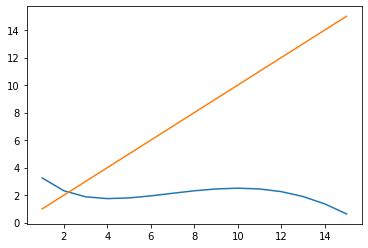

In [355]:
a.show()

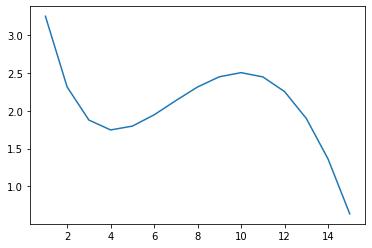

In [264]:
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

def f1(x):
    return 3.43914511 + math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

def f2(x):
    return 3.43914511 - 0.18692825*x

def f3(x):
    return 3.32512949 - 0.06531159*x - 0.00760104*x**2

def f4(x):
    return 4.36264154 - 1.29552587*x + 0.19333685*x**2 - 0.00823565*x**3

scipy.linalg.solve([1], [f(15)])
plt.plot([x for x in range(1,16)], [f(x) for x in range(1,16)])


In [249]:
scipy.linalg.solve([[1, 1], [1, 15]], [f(1), f(15)])

array([ 3.43914511, -0.18692825])

3.2522168600000003
3.06528861
2.8783603600000003
2.69143211
2.5045038600000002
2.3175756100000005
2.13064736
1.9437191100000002
1.7567908600000002
1.5698626100000002
1.3829343600000001
1.1960061100000003
1.00907786
0.8221496100000003
0.6352213600000001


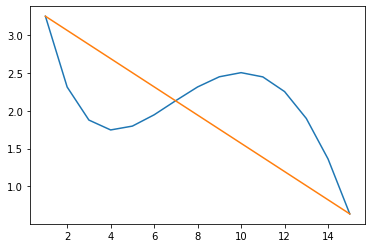

In [385]:
plt.plot([x for x in range(1,16)], [f(x) for x in range(1,16)], [x for x in range(1,16)], [f2(x) for x in range(1,16)])
for i in range(1,16):
    print(f2(i))

In [251]:
scipy.linalg.solve([[1, 1, 1], [1, 8, 64], [1, 15, 225]], [f(1), f(8), f(15)])

array([ 3.32512949, -0.06531159, -0.00760104])

3.252216865271419 3.2522168600000003 1
2.3150338432311584 3.16410215 2
1.8778384165859365 3.06078536 3
1.7468459495903677 2.94226649 4
1.7977761044492575 2.8085455400000003 5
1.9472212830789883 2.65962251 6
2.135438978951904 2.4954974 7
2.316170159053224 2.31617021 8
2.450823645392045 2.12164094 9
2.5054164070002463 1.91190959 10
2.4492912840300085 1.6869761600000004 11
2.25501049731666 1.44684065 12
1.8990446617425354 1.19150306 13
1.3630033452333579 0.9209633900000003 14
0.6352214195786656 0.6352216399999999 15


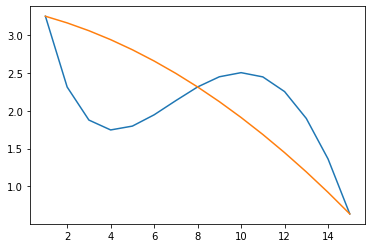

In [263]:
plt.plot([x for x in range(1,16)], [f(x) for x in range(1,16)], [x for x in range(1,16)], [f3(x) for x in range(1,16)])

In [256]:
scipy.linalg.solve([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 225*15]], [f(1), f(4), f(10), f(15)])

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

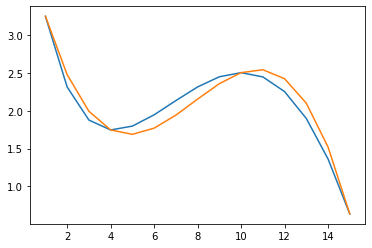

In [265]:
plt.plot([x for x in range(1,16)], [f(x) for x in range(1,16)], [x for x in range(1,16)], [f4(x) for x in range(1,16)])

In [266]:
text = scipy.linalg.solve([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 225*15]], [f(1), f(4), f(10), f(15)])
with open('solution_2.txt', 'w') as file:
    file.write(str(text[0])+' '+ str(text[1])+' '+ str(text[2])+' '+ str(text[3]))

In [292]:
l = [1,4,10,15]
[[l[k]**k for k in range(len(l))] for i in range(len(l))]

[[1, 4, 100, 3375], [1, 4, 100, 3375], [1, 4, 100, 3375], [1, 4, 100, 3375]]

In [388]:
l=[ 3.43914511, -0.18692825] #x

l1 = [9,10,11,10]
[sum([l[k]*el**[i for i in range(len(l))][k] for k in range(len(l))]) for el in range(1,16)]
# f = list(map(lambda w, x: w*x, [l[k]**k for k in range(len(l))]))
# f

[3.2522168600000003,
 3.06528861,
 2.8783603600000003,
 2.69143211,
 2.5045038600000002,
 2.3175756100000005,
 2.13064736,
 1.9437191100000002,
 1.7567908600000002,
 1.5698626100000002,
 1.3829343600000001,
 1.1960061100000003,
 1.00907786,
 0.8221496100000003,
 0.6352213600000001]